In [1]:
!pip install --upgrade tensorflow keras Pillow matplotlib seaborn

     |████████████████████████████████| 454.3 MB 5.1 kB/s eta 0:00:01     |███████████████████             | 268.3 MB 3.9 MB/s eta 0:00:48
     |████████████████████████████████| 4.0 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 6.2 MB/s eta 0:00:01


  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tf.__version__

'2.5.0'

# Data Preprocessing



In [4]:
images = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)
print(images.__dict__.keys())
print(images._structure)

Found 15951 files belonging to 2 classes.
dict_keys(['_input_dataset', '_batch_size', '_drop_remainder', '_structure', '_variant_tensor_attr', '_self_setattr_tracking', '_self_unconditional_checkpoint_dependencies', '_self_unconditional_dependency_names', '_self_unconditional_deferred_dependencies', '_self_update_uid', '_self_name_based_restores', '_self_saveable_object_factories', '_variant_tracker', '_graph_attr', '_options_attr', 'class_names', 'file_paths'])
(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
#print(training_set.__dict__)


Found 15951 images belonging to 2 classes.


[0 0 0 ... 1 1 1]


/home/joaoegewarth/.virtualenvs/deeplearning/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

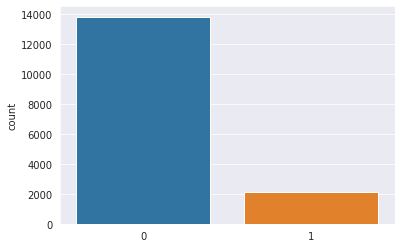

In [18]:
print(training_set.classes)

sns.set_style('darkgrid')
sns.countplot(training_set.classes)

In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 327 images belonging to 2 classes.


####  

/home/joaoegewarth/.virtualenvs/deeplearning/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

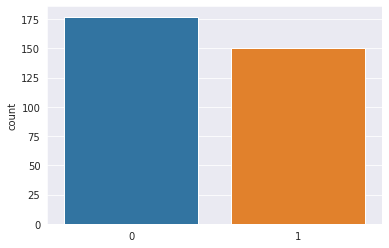

In [20]:
#print(test_set.classes)

sns.set_style('darkgrid')
sns.countplot(test_set.classes)

In [21]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[256, 256, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [22]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
499/499 [==============================] - 839s 2s/step - loss: 0.1530 - accuracy: 0.9428 - val_loss: 0.2194 - val_accuracy: 0.9174
Epoch 2/10
499/499 [==============================] - 774s 2s/step - loss: 0.1488 - accuracy: 0.9453 - val_loss: 0.3491 - val_accuracy: 0.8838
Epoch 3/10
499/499 [==============================] - 774s 2s/step - loss: 0.1473 - accuracy: 0.9450 - val_loss: 0.2623 - val_accuracy: 0.9235
Epoch 4/10
499/499 [==============================] - 770s 2s/step - loss: 0.1386 - accuracy: 0.9468 - val_loss: 0.2533 - val_accuracy: 0.9083
Epoch 5/10
499/499 [==============================] - 753s 2s/step - loss: 0.1285 - accuracy: 0.9515 - val_loss: 0.2455 - val_accuracy: 0.9205
Epoch 6/10
499/499 [==============================] - 751s 2s/step - loss: 0.1301 - accuracy: 0.9519 - val_loss: 0.3108 - val_accuracy: 0.8960
Epoch 7/10
499/499 [==============================] - 731s 1s/step - loss: 0.1223 - accuracy: 0.9542 - val_loss: 0.3536 - val_accuracy: 0.9021